## This section performs preprocessing of the dataset.

### Load necessary packages

In [1]:
!pip install wordcloud
!pip install nltk

  Using cached wordcloud-1.9.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (455 kB)
  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Using cached regex-2023.6.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (770 kB)


In [5]:
# coding: utf-8

# # Import the Dataset
import pandas as pd
import re
import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize

df_train = pd.read_csv('dataset/train.csv')
df_test = pd.read_csv('dataset/test.csv')
#sample_submission = pd.read_csv('dataset/sample_submission.csv')


# # Cleaning the Text

# Convert location and text to lowercase
def make_lower(dataframe):
    # Convert location and text to lowercase
    dataframe['location'] = dataframe['location'].str.lower()
    dataframe['text'] = dataframe['text'].str.lower()
    return(dataframe)

# Remove URLs, numbers, and non-alphanumeric characters
def remove_url_nums_nonalpha(dataframe):
    dataframe['text'] = dataframe['text'].apply(lambda x: re.sub(r'http[s]?://\S+|[^A-Za-z ]|\d+', ' ', str(x)))
    dataframe['location'] = dataframe['location'].apply(lambda x: re.sub(r'http[s]?://\S+|[^A-Za-z ]|\d+', ' ', str(x)))
    return(dataframe)

# Remove stopwords
def remove_stopwords(dataframe):
    # Load stopwords list from Natural Language Tool Kit (NLTK) into a set
    stopwords = set(pd.read_csv('dataset/NLTKs_list_of_english_stopwords', sep=' ', header=None, names=['stopwords'])['stopwords'])
    
    # Remove the stopwords from the dataset
    dataframe['text'] = dataframe['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))
    # # note - it may not make sense to do stopword removal on the location field
    dataframe['location'] = dataframe['location'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))
    return(dataframe)

# Tokenize the text and store the tokens back into the dataframe as a new column
def tokenize_text(dataframe):
    dataframe['text_tokens'] = dataframe['text'].apply(lambda x: word_tokenize(x))
    return(dataframe)

# Perform stemming as described in this reference:
# https://towardsdatascience.com/text-cleaning-methods-for-natural-language-processing-f2fc1796e8c7
def stem_the_words(dataframe):
    # This assumes that the text column has already been tokenized and the result is in column 'text_tokens'
    def word_stemmer(text):
        stem_text = [PorterStemmer().stem(i) for i in text]
        return stem_text
    dataframe['text_tokesn_stem'] = dataframe['text_tokens'].apply(lambda x: word_stemmer(x))
    return(dataframe)

# Perform lemmatization as described in this reference:
# https://towardsdatascience.com/text-cleaning-methods-for-natural-language-processing-f2fc1796e8c7
# Note: because lemmatization uses punctuation to distinguish parts of speach it may not be a good choice to use with tweets
#       because of the use of very non-standard grammer.
def lemm_the_words(dataframe):
    # Use the lemmatizer to stem the word tokens storing them again in a new column in the dataframe
    nltk.download('wordnet')
    def word_lemmatizer(text):
        lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
        return lem_text
    dataframe['text_tokens_lemma'] = dataframe['text_tokens'].apply(lambda x: word_lemmatizer(x))
    return(dataframe)


def clean_data(dataframe):
    # Convert location and text to lowercase
    dataframe = make_lower(dataframe)
    
    # Remove URLs, numbers, and non-alphanumeric characters
    remove_url_nums_nonalpha(dataframe)

    # Remove stopwords
    remove_stopwords(dataframe)
    
    # Stemming and Lemmatization both rely on the text having been tokenized and the tokens having been saved in a column
    # named 'text_tokens' so we do that now
    tokenize_text(dataframe)
    
    # Stem the tokens
    stem_the_words(dataframe)
    
    # Lemmatize the tokens
    lemm_the_words(dataframe)
    
# Clean the text
clean_data(df_train)
clean_data(df_test)

sample = df_test.sample(n=5)
print(sample)

# Save the cleaned data as CSV
df_train.to_csv('dataset/cleaned_train.csv', index=False)
df_test.to_csv('dataset/cleaned_test.csv', index=False)

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


         id   keyword                    location  \
2271   7574  outbreak         nashville tennessee   
814    2678     crush                         usa   
3007   9929   trouble                         nan   
3030  10007   tsunami                               
1717   5788      hail  sales specialist worldwide   

                                                   text  \
2271  families sue legionnaires families affected fa...   
814   crush cars wrestling stars mmx racing featurin...   
3007         sitting room whole time vegas stay trouble   
3030  help support victims japanese earthquake pacif...   
1717  hvy rain wind sm hail tree bluff ridge rd mult...   

                                            text_tokens  \
2271  [families, sue, legionnaires, families, affect...   
814   [crush, cars, wrestling, stars, mmx, racing, f...   
3007  [sitting, room, whole, time, vegas, stay, trou...   
3030  [help, support, victims, japanese, earthquake,...   
1717  [hvy, rain, wind, sm, hai

## This section performs analysis of the dataset and cleaned versions of the dataset.

### This section show results from the original training dataset, i.e. without any preprocessing

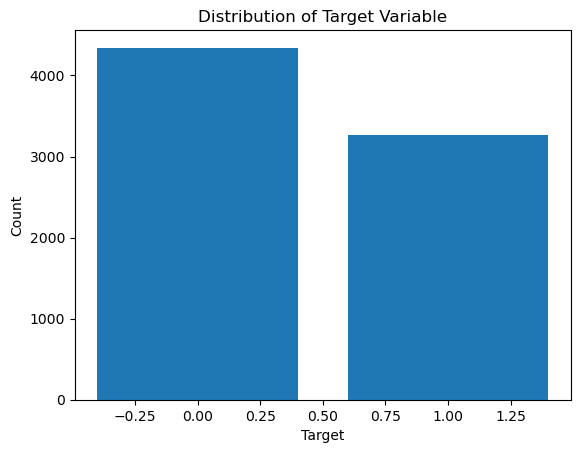

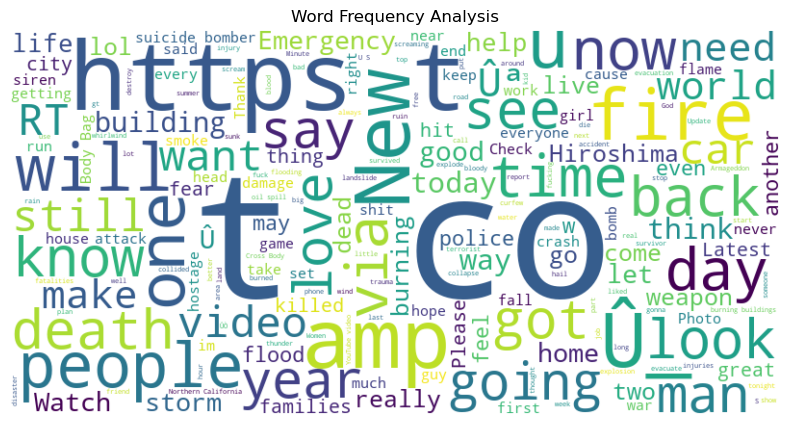

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Import the dataset, pre cleaning
df_train = pd.read_csv('dataset/train.csv')

# Distribution of Target Variable
target_counts = df_train['target'].value_counts() 
plt.bar(target_counts.index, target_counts.values)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')
plt.show()

# Word Frequency Analysis on the cleaned training data
text = ' '.join(df_train['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Frequency Analysis')
plt.show()

### This section shows results with the cleaned training dataset

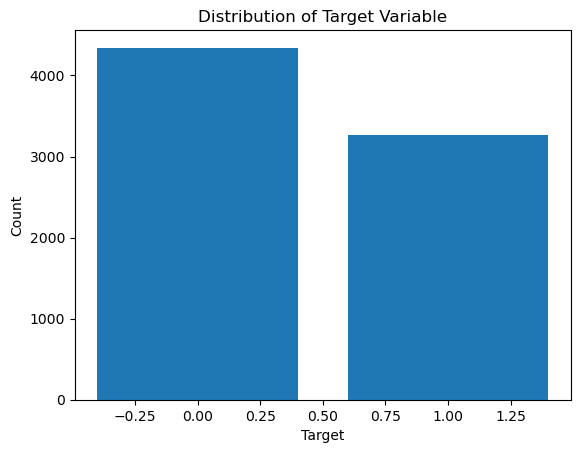

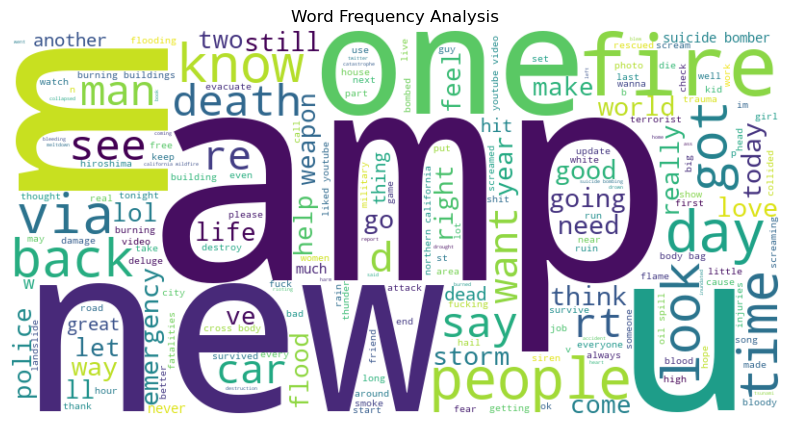

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Now import the cleaned dataset to allow for comparison
df_train = pd.read_csv('dataset/cleaned_train.csv')

# Distribution of Target Variable
target_counts = df_train['target'].value_counts() 
plt.bar(target_counts.index, target_counts.values)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')
plt.show()

# Word Frequency Analysis on the cleaned training data
text = ' '.join(df_train['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Frequency Analysis')
plt.show()